In [1]:
import torch
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
allTimeSeries=torch.load("data/192T/time_series.pt")
allMasks=torch.load("data/192T/masks.pt")
allDiffs=torch.load("data/192T/diffs.pt")
allLabels=torch.load("data/192T/labels.pt")

In [9]:
#IMPUTATION WITH MEAN OF ENTIRE TIME SEREIS

def impute_mean(allTimeSeries, allMasks, allDiffs):
    
    #CHANGE TO 6261 TO ITERATE OVER ALL PATIENTS' TIME SERIES
    numOfPatients = 3
    
    timeStepVector = [s for s in range(192)]
    allTimeSeriesAfterImputingTensor = torch.zeros(size=(numOfPatients, 192, 59))
    allMasksAfterImputingTensor = torch.zeros(size=(numOfPatients, 192, 59))
    allDiffsAfterImputingTensor = torch.zeros(size=(numOfPatients, 192, 59))

    for i in range(0, numOfPatients):                         #6261 is num of patients
        timeSeriesForOnePatient = allTimeSeries[i]   #selected first patient in dataset
        masksForOnePatient = allMasks[i]
        diffsForOnePatient = allDiffs[i]


        for j in range(59):                       #59 is num of variables
            oneTimeSeries = np.asarray(timeSeriesForOnePatient[..., j])
            oneMask = np.asarray(masksForOnePatient[..., j])
            oneDiff = np.asarray(diffsForOnePatient[..., j])
            print('patient num', i, 'variable number: ', j)
            realObservations = []                #vector with observed data values that are not outliers
            indexesOfRealObservations = []

            #fill up yVector with observed data values
            for k in range(192):
                if (oneMask[k]==0.0):              #if datapoint is NOT originally missing
                    indexesOfRealObservations.append(k)
                    realObservations.append(oneTimeSeries[k])

            #calculating mean, standard deviation, bounds for outliers
            mean = np.mean(realObservations)
            sd = np.std(realObservations)
            upperBound = mean + 2*sd
            lowerBound = mean - 2*sd

            #finding outliers    
            indexesOfNoOutliersRealObservations = []
            noOutliersRealObservations = []
            for t in range(len(realObservations)):
                indexesOfNoOutliersRealObservations.append(indexesOfRealObservations[t])
                noOutliersRealObservations.append(realObservations[t])
            for m in range(len(realObservations)):
                if (realObservations[m] > upperBound or realObservations[m] < lowerBound):
                    print('outlier tick')
                    indexOfOutlierInOriginalTS = indexesOfRealObservations[m]
                    print('outlier index in original TS: ', indexOfOutlierInOriginalTS)
                    indexesOfNoOutliersRealObservations.remove(indexOfOutlierInOriginalTS)
                    noOutliersRealObservations.remove(realObservations[m])
                else:    #if this real observation is not an outlier
                    pass
            
            #imputing time series outliers and missing values with NEW mean, masks with 1.0, diffs with 0.0 ()
            if len(indexesOfRealObservations)==0:
                pass
            else:
                mean = np.mean(noOutliersRealObservations)
                for n in range(192):
                    if (n not in indexesOfNoOutliersRealObservations):    #if oneTimeSereis[n] is outlier or missing
                        oneTimeSeries[n] = mean
                        oneMask[n] = 1.0
                        if n==0:
                            oneDiff[n] = 0.0
                        else:
                            oneDiff[n] = oneDiff[n-1] + (1/48)
                            #print('it is doing what it is supposed to for timestep ' , n ,
                            #      '/n and value oneDiff[n] after getting updated is', oneDiff[n] )
                    else:                                                 #if it is not outlier or missing
                        oneDiff[n] = 0.0

            """          
            plotting time series with red dots representing real data points that are not outliers(points that were not imputed)
            plt.plot(timeStepVector, oneTimeSeries)
            if (len(realObservations)==0):
                pass
            else:
                plt.scatter(indexesOfNoOutliersRealObservations, noOutliersRealObservations, marker='o', color="red")
            plt.xlabel('time step')
            plt.ylabel('medical variable')
            plt.show()
            """
            
            #plotting timeseries, masks, and diffs
            plt.subplot(3,1,1)
            plt.plot(timeStepVector, oneTimeSeries)
            plt.title('Zero-Imputed Time Series')
            plt.ylabel('medical value')
            plt.xlabel('')

            plt.subplot(3,1,2)
            plt.scatter(timeStepVector, oneMask, color="red", s=1)
            plt.title('Missing Data: boolean variable')
            plt.ylabel('1=missing')
            plt.axis([0, 200, -.092, 1.092])
            plt.xlabel('')

            plt.subplot(3,1,3)
            plt.scatter(timeStepVector, oneDiff, c='green', s=1)
            plt.title('Time Step Difference Between Observations')
            plt.ylabel('count')
            plt.xlabel('time step')
            plt.tight_layout()
            plt.show()

            #putting vectors in original tensor shapes
            allTimeSeriesAfterImputingTensor[i, ..., j] = torch.from_numpy(np.asarray(oneTimeSeries))
            allMasksAfterImputingTensor[i, ..., j] = torch.from_numpy(np.asarray(oneMask))
            allDiffsAfterImputingTensor[i, ..., j] = torch.from_numpy(np.asarray(oneDiff))

    return allTimeSeriesAfterImputingTensor, allMasksAfterImputingTensor, allDiffsAfterImputingTensor

patient num 0 variable number:  0


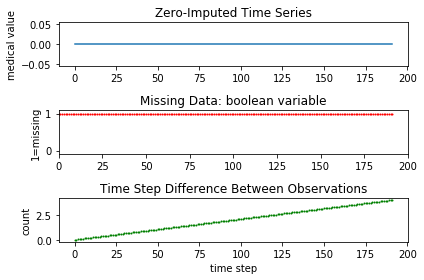

patient num 0 variable number:  1


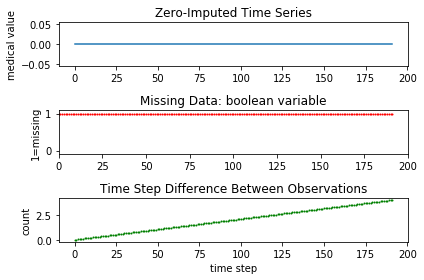

patient num 0 variable number:  2


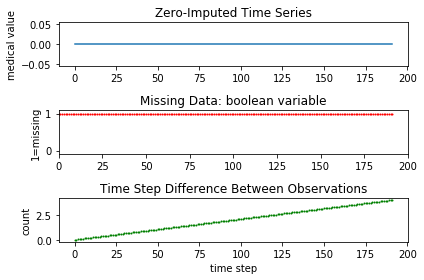

patient num 0 variable number:  3


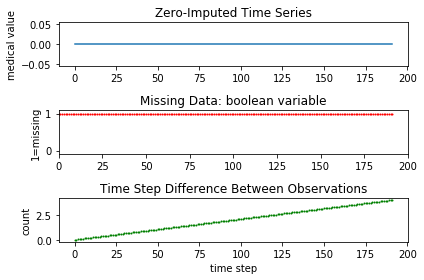

patient num 0 variable number:  4


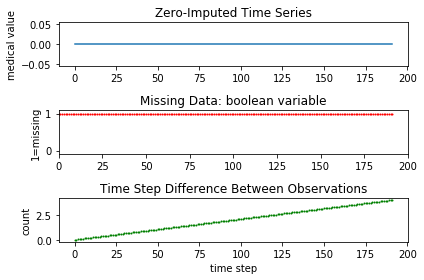

patient num 0 variable number:  5


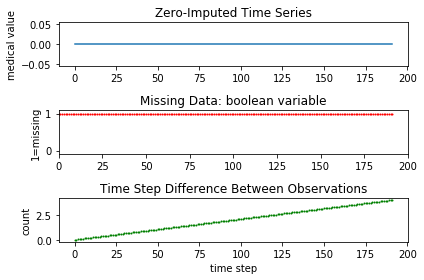

patient num 0 variable number:  6


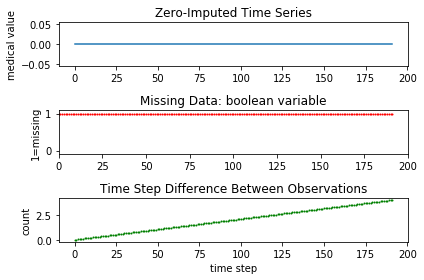

patient num 0 variable number:  7


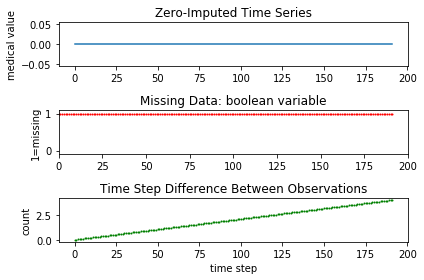

patient num 0 variable number:  8


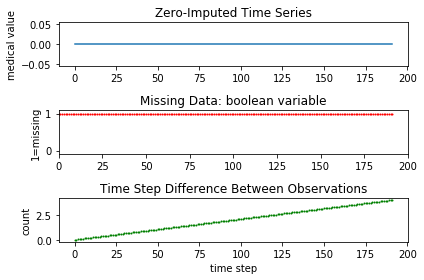

patient num 0 variable number:  9


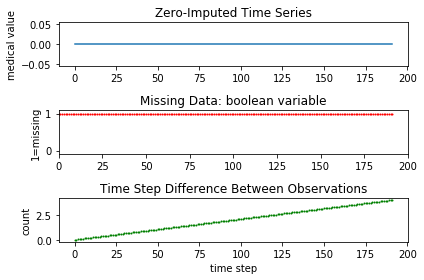

patient num 0 variable number:  10


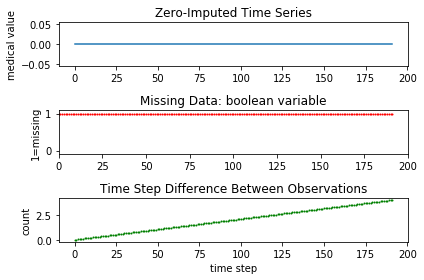

patient num 0 variable number:  11


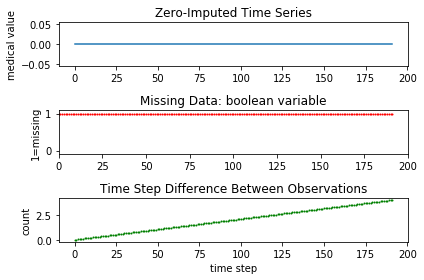

patient num 0 variable number:  12


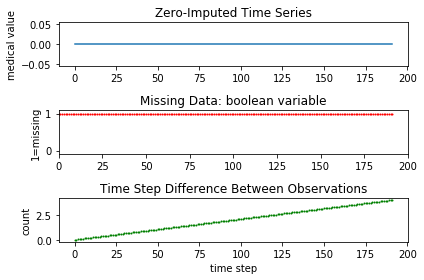

patient num 0 variable number:  13


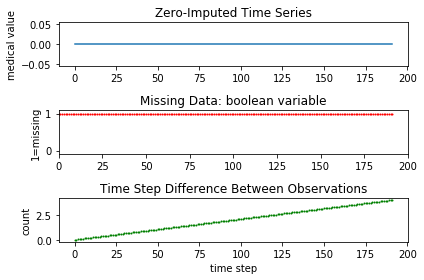

patient num 0 variable number:  14


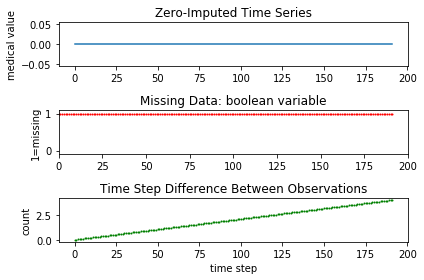

patient num 0 variable number:  15
index where Diff got 0.0 b/c there was outlier, n=  0


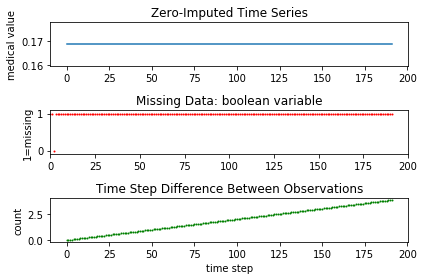

patient num 0 variable number:  16
index where Diff got 0.0 b/c there was outlier, n=  0


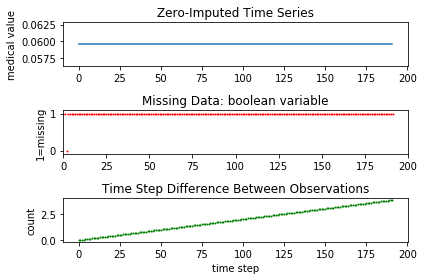

patient num 0 variable number:  17


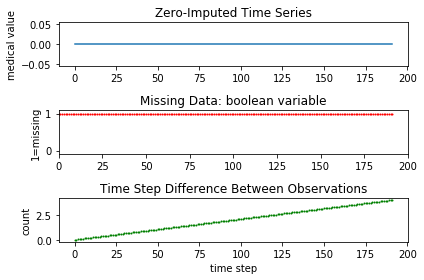

patient num 0 variable number:  18
index where Diff got 0.0 b/c there was outlier, n=  0


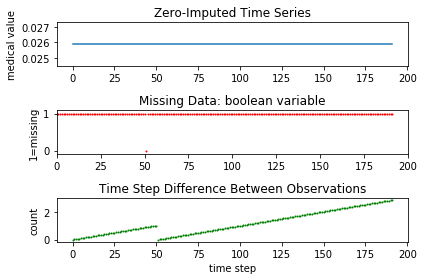

patient num 0 variable number:  19


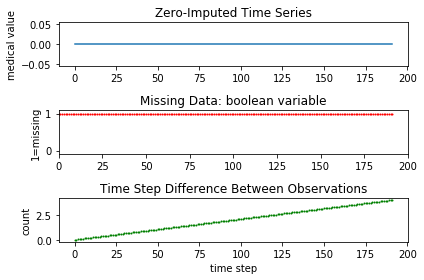

patient num 0 variable number:  20
index where Diff got 0.0 b/c there was outlier, n=  0


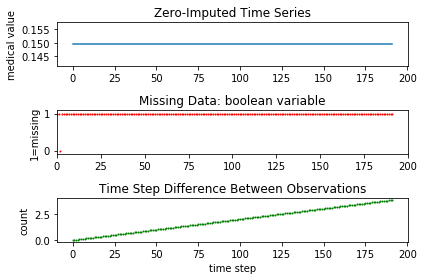

patient num 0 variable number:  21
index where Diff got 0.0 b/c there was outlier, n=  0


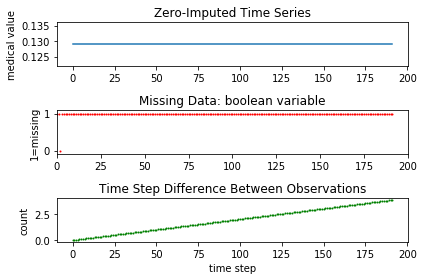

patient num 0 variable number:  22
index where Diff got 0.0 b/c there was outlier, n=  0


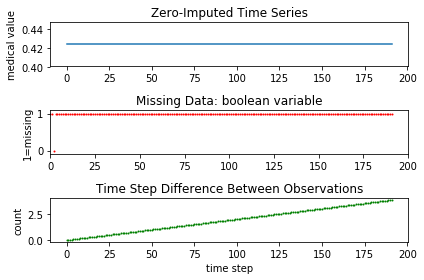

patient num 0 variable number:  23
index where Diff got 0.0 b/c there was outlier, n=  0


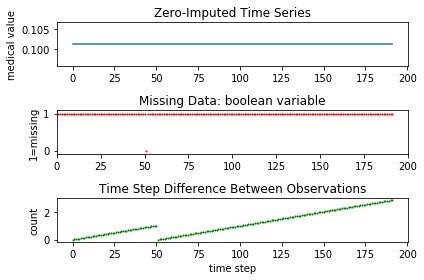

patient num 0 variable number:  24


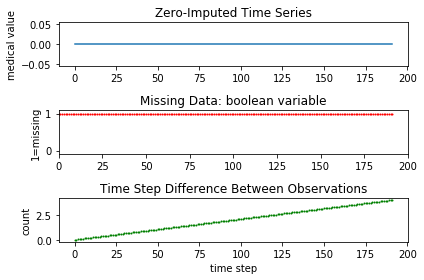

patient num 0 variable number:  25
index where Diff got 0.0 b/c there was outlier, n=  0


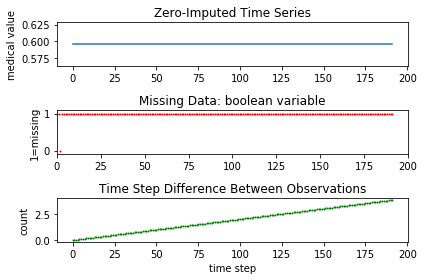

patient num 0 variable number:  26
index where Diff got 0.0 b/c there was outlier, n=  0


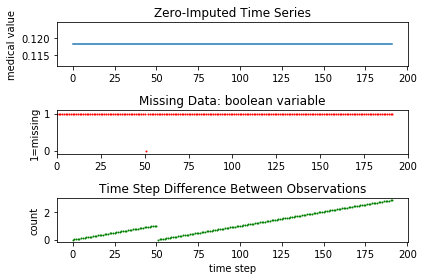

patient num 0 variable number:  27


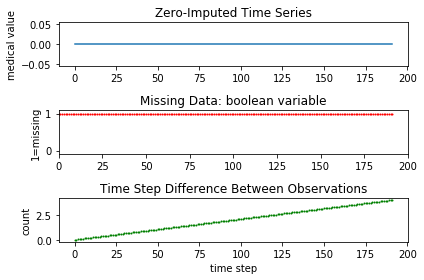

patient num 0 variable number:  28
index where Diff got 0.0 b/c there was outlier, n=  0


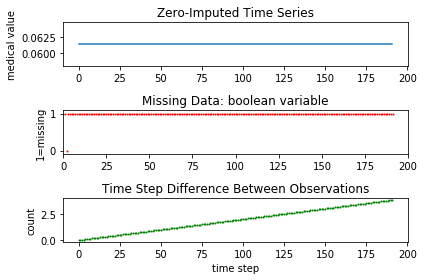

patient num 0 variable number:  29
index where Diff got 0.0 b/c there was outlier, n=  0


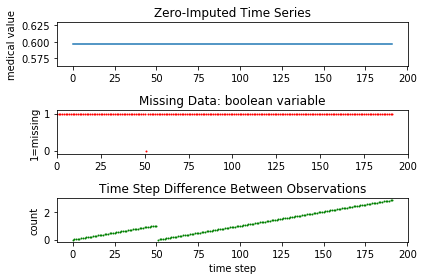

patient num 0 variable number:  30
index where Diff got 0.0 b/c there was outlier, n=  0


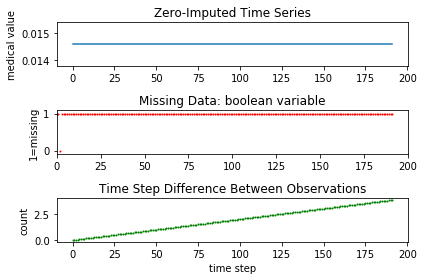

patient num 0 variable number:  31


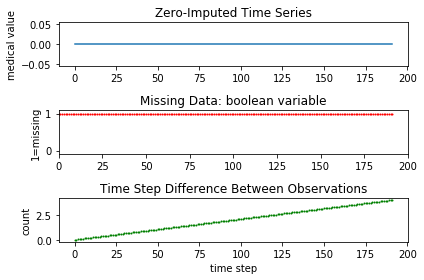

patient num 0 variable number:  32
index where Diff got 0.0 b/c there was outlier, n=  0


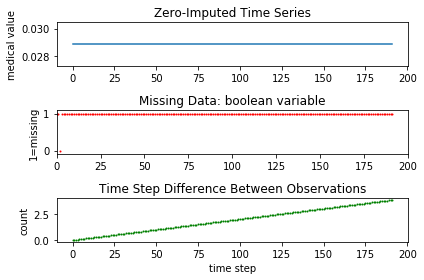

patient num 0 variable number:  33
index where Diff got 0.0 b/c there was outlier, n=  0


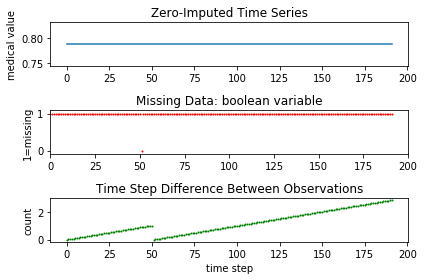

patient num 0 variable number:  34


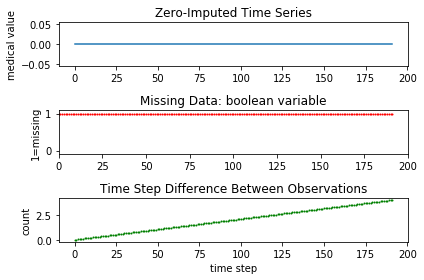

patient num 0 variable number:  35


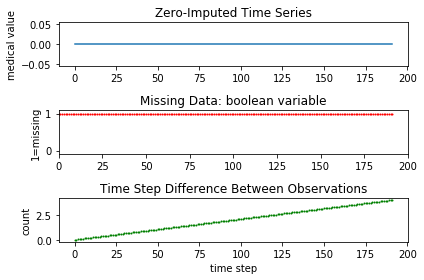

patient num 0 variable number:  36


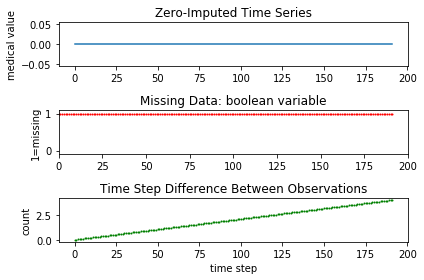

patient num 0 variable number:  37


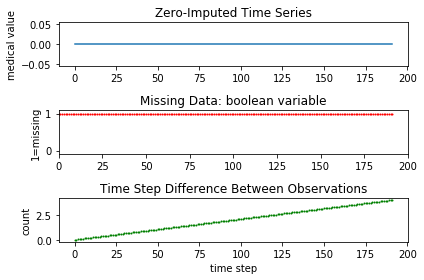

patient num 0 variable number:  38


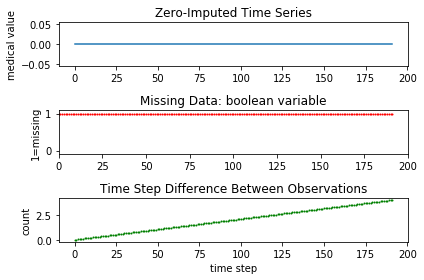

patient num 0 variable number:  39


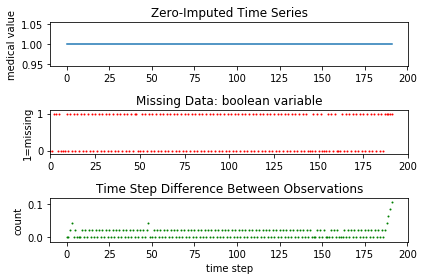

patient num 0 variable number:  40


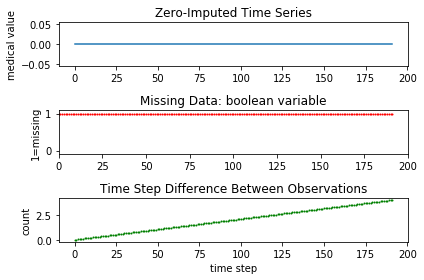

patient num 0 variable number:  41


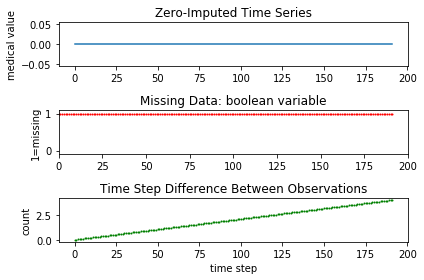

patient num 0 variable number:  42


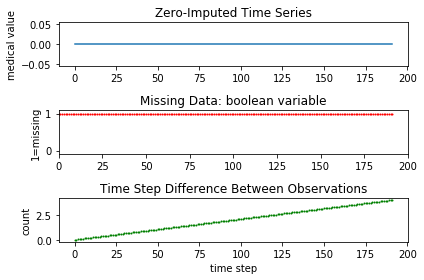

patient num 0 variable number:  43


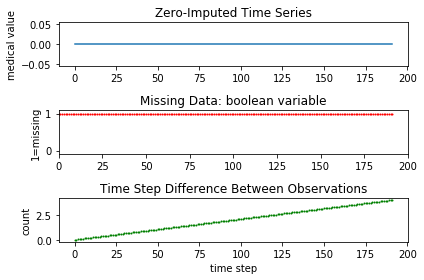

patient num 0 variable number:  44


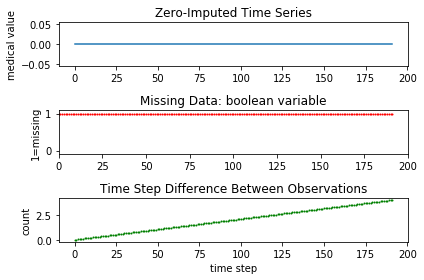

patient num 0 variable number:  45


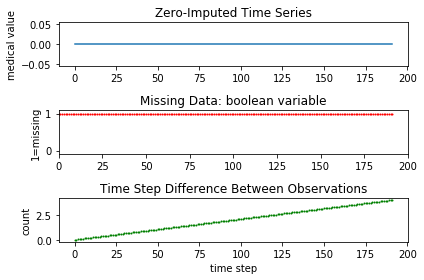

patient num 0 variable number:  46


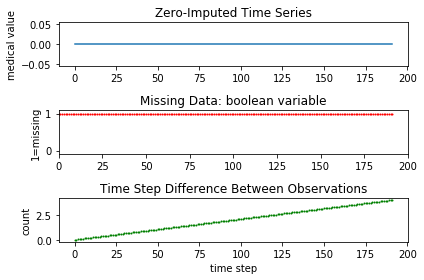

patient num 0 variable number:  47


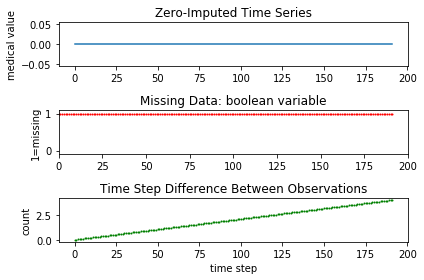

patient num 0 variable number:  48


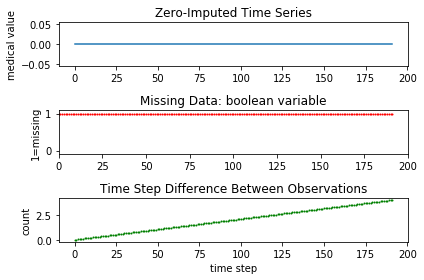

patient num 0 variable number:  49


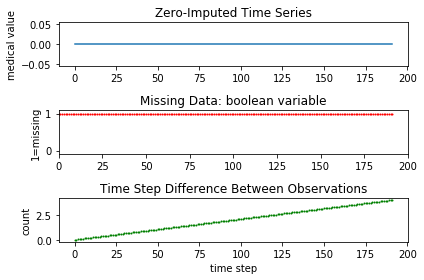

patient num 0 variable number:  50


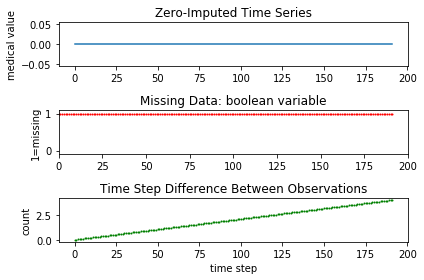

patient num 0 variable number:  51


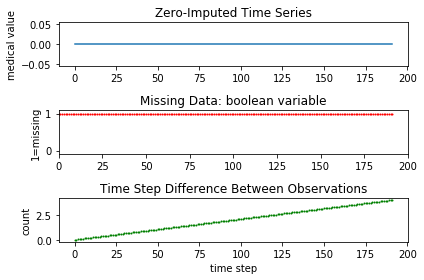

patient num 0 variable number:  52


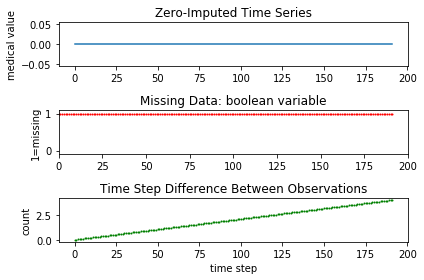

patient num 0 variable number:  53


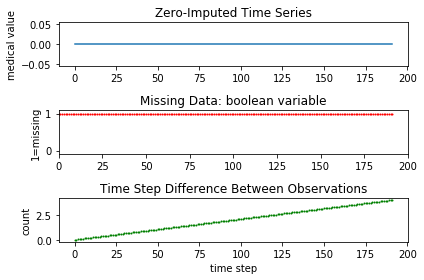

patient num 0 variable number:  54


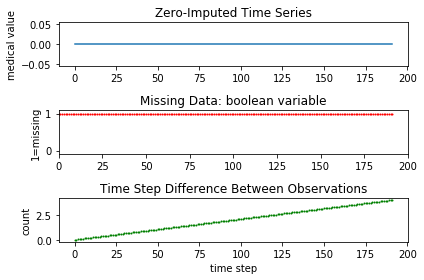

patient num 0 variable number:  55


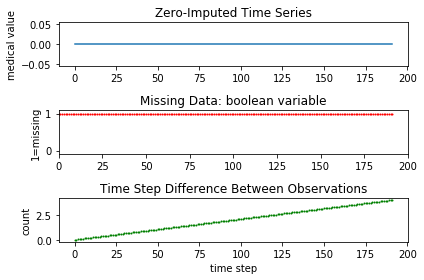

patient num 0 variable number:  56


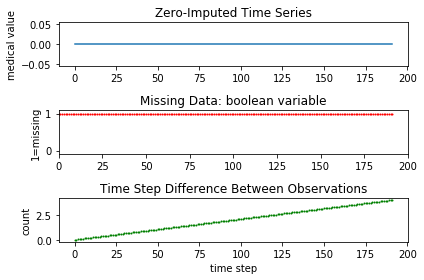

patient num 0 variable number:  57


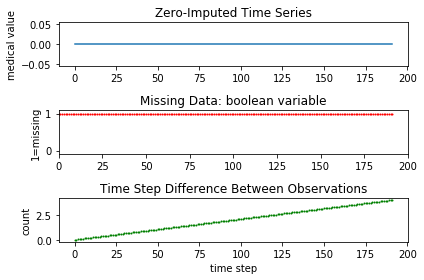

patient num 0 variable number:  58


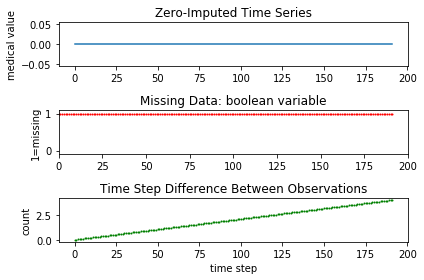

patient num 1 variable number:  0


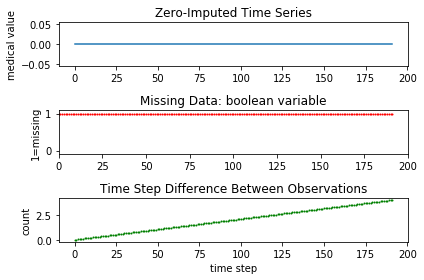

patient num 1 variable number:  1


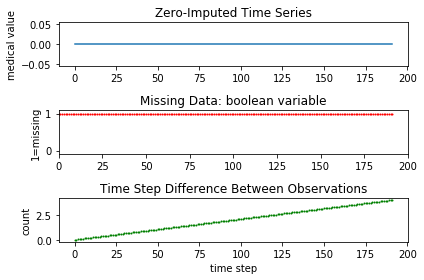

patient num 1 variable number:  2


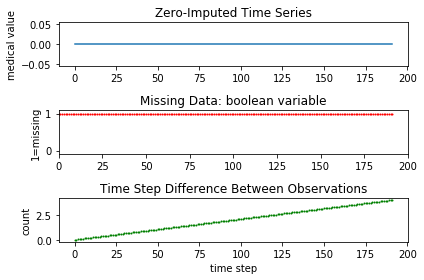

patient num 1 variable number:  3


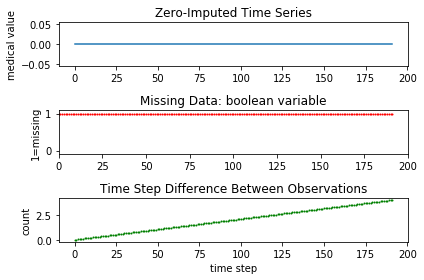

patient num 1 variable number:  4


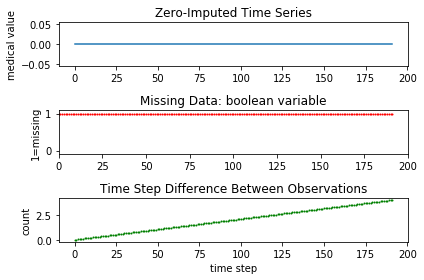

patient num 1 variable number:  5


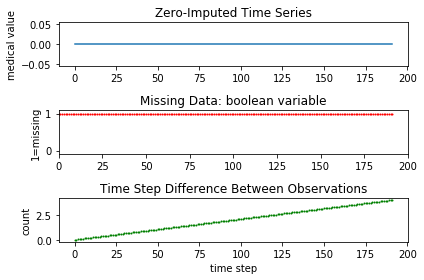

patient num 1 variable number:  6


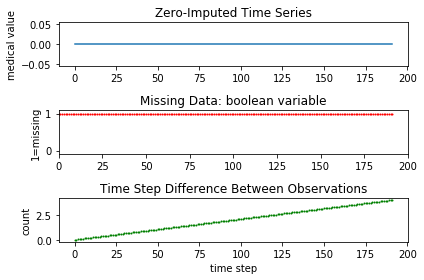

patient num 1 variable number:  7


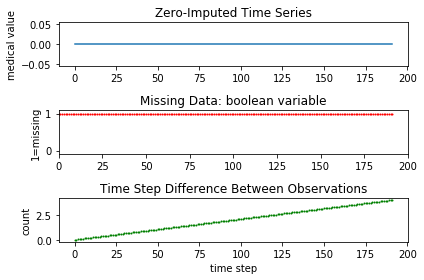

patient num 1 variable number:  8


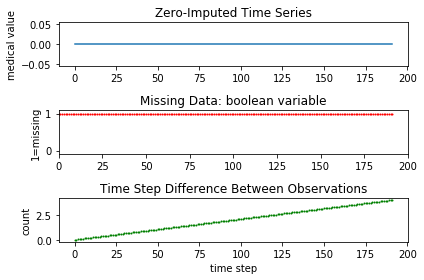

patient num 1 variable number:  9


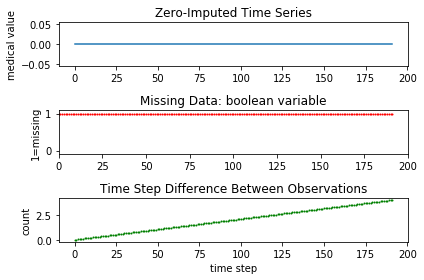

patient num 1 variable number:  10


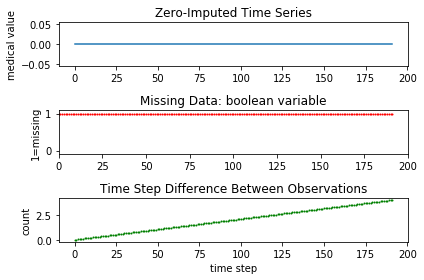

patient num 1 variable number:  11
index where Diff got 0.0 b/c there was outlier, n=  0


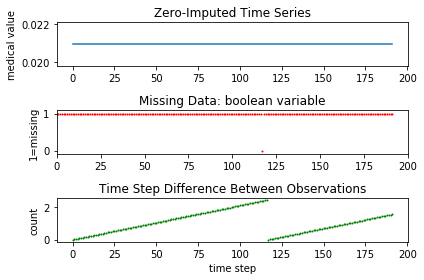

patient num 1 variable number:  12


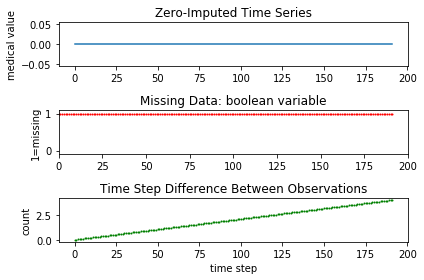

patient num 1 variable number:  13


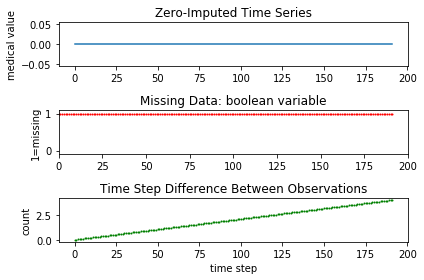

patient num 1 variable number:  14
index where Diff got 0.0 b/c there was outlier, n=  0


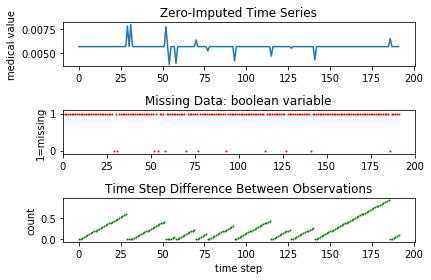

patient num 1 variable number:  15


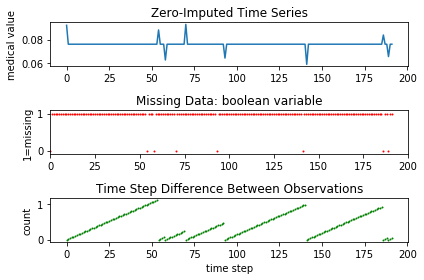

patient num 1 variable number:  16


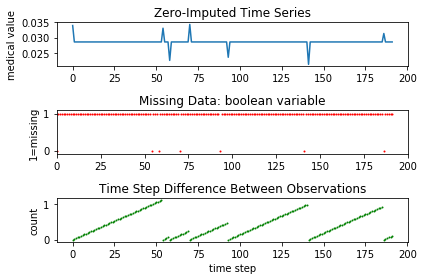

patient num 1 variable number:  17
index where Diff got 0.0 b/c there was outlier, n=  0


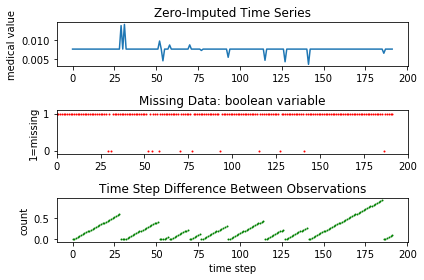

patient num 1 variable number:  18


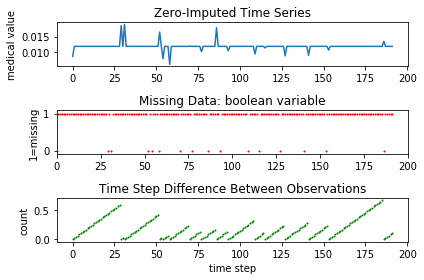

patient num 1 variable number:  19


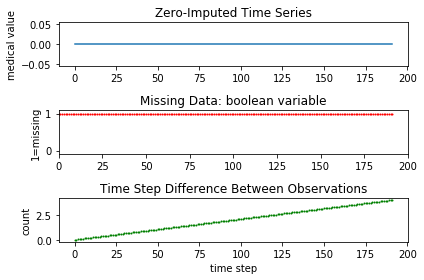

patient num 1 variable number:  20


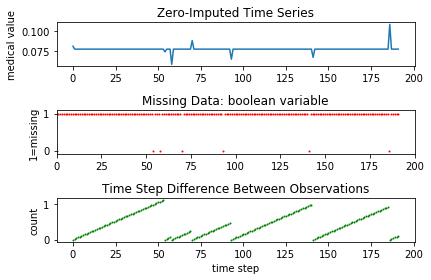

patient num 1 variable number:  21


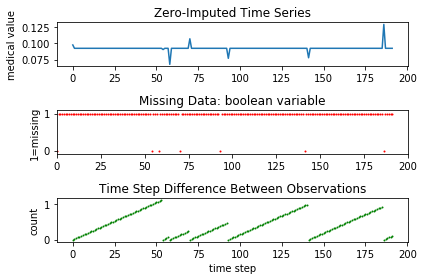

patient num 1 variable number:  22


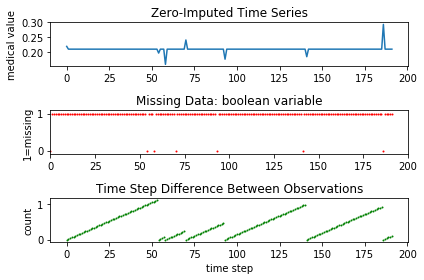

patient num 1 variable number:  23


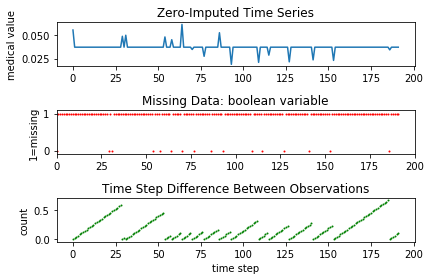

patient num 1 variable number:  24


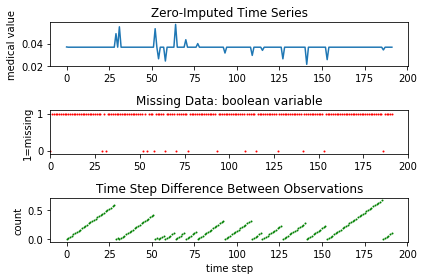

patient num 1 variable number:  25


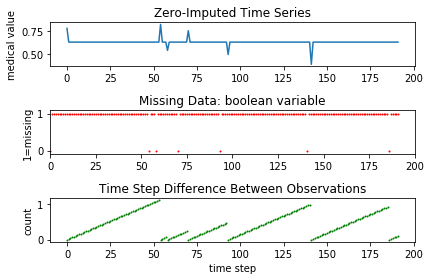

patient num 1 variable number:  26


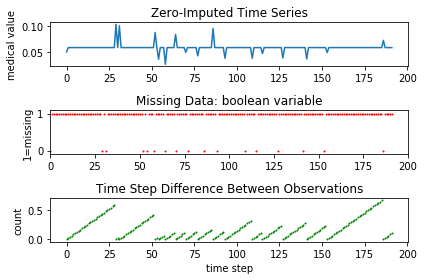

patient num 1 variable number:  27
index where Diff got 0.0 b/c there was outlier, n=  0


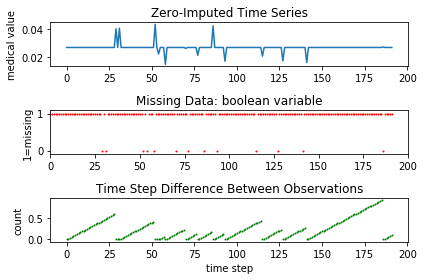

patient num 1 variable number:  28


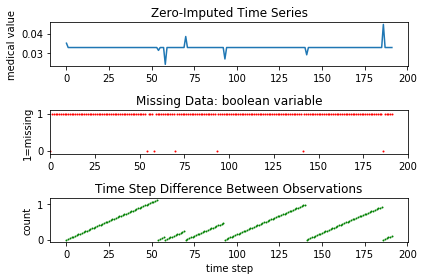

patient num 1 variable number:  29


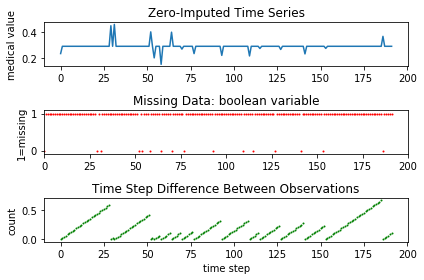

patient num 1 variable number:  30


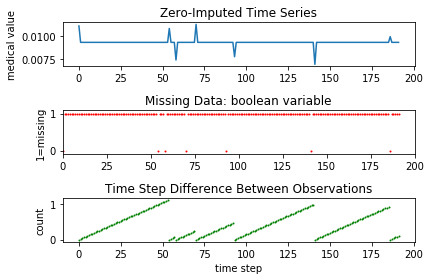

patient num 1 variable number:  31


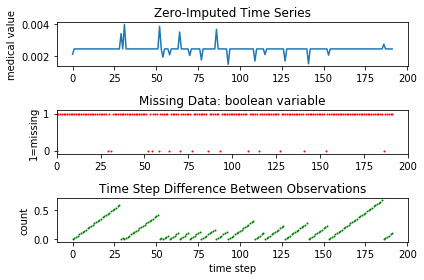

patient num 1 variable number:  32


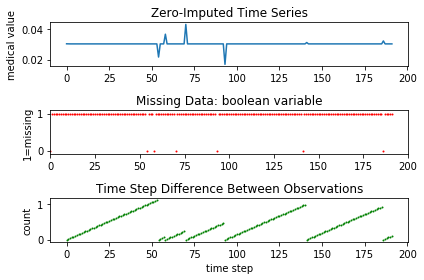

patient num 1 variable number:  33


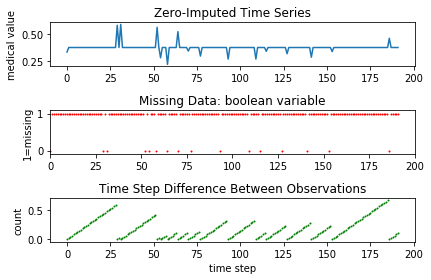

patient num 1 variable number:  34


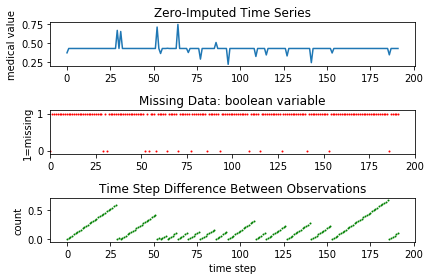

patient num 1 variable number:  35
outlier tick
outlier index in original TS:  191
index where Diff got 0.0 b/c there was outlier, n=  0


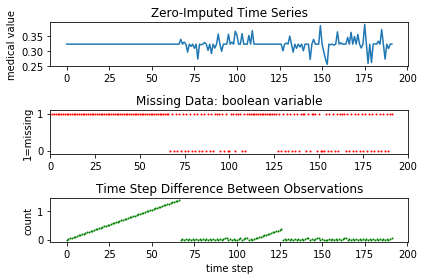

patient num 1 variable number:  36
outlier tick
outlier index in original TS:  81
outlier tick
outlier index in original TS:  107
index where Diff got 0.0 b/c there was outlier, n=  0


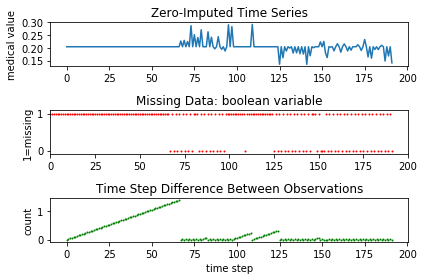

patient num 1 variable number:  37
index where Diff got 0.0 b/c there was outlier, n=  0


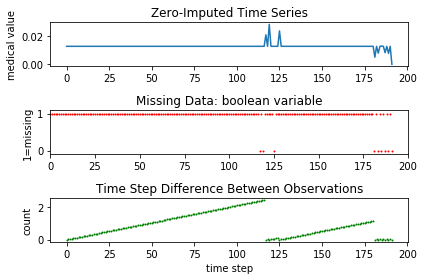

patient num 1 variable number:  38
index where Diff got 0.0 b/c there was outlier, n=  0


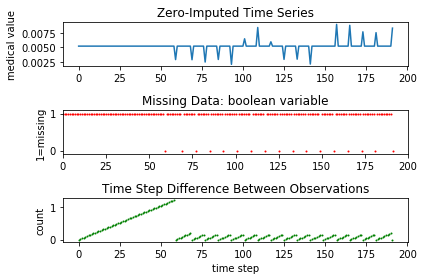

patient num 1 variable number:  39
outlier tick
outlier index in original TS:  131
index where Diff got 0.0 b/c there was outlier, n=  0


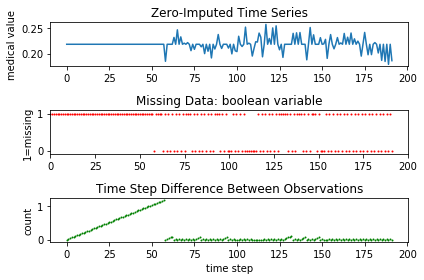

patient num 1 variable number:  40
index where Diff got 0.0 b/c there was outlier, n=  0


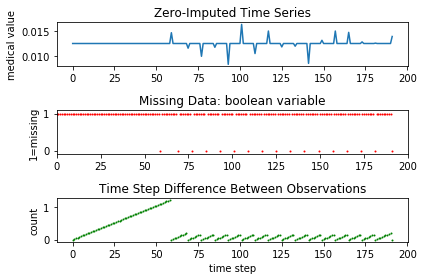

patient num 1 variable number:  41
index where Diff got 0.0 b/c there was outlier, n=  0


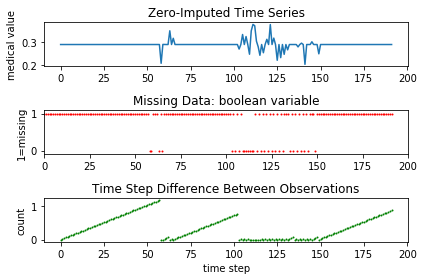

patient num 1 variable number:  42
index where Diff got 0.0 b/c there was outlier, n=  0


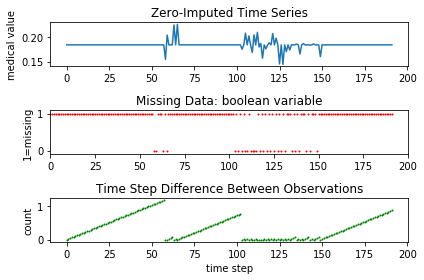

patient num 1 variable number:  43
outlier tick
outlier index in original TS:  105
outlier tick
outlier index in original TS:  165
index where Diff got 0.0 b/c there was outlier, n=  0


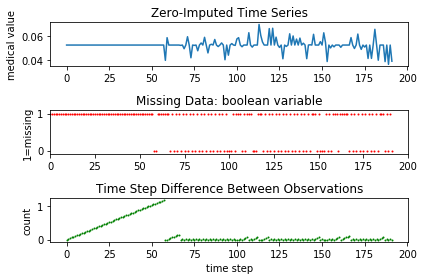

patient num 1 variable number:  44
outlier tick
outlier index in original TS:  77
outlier tick
outlier index in original TS:  103
outlier tick
outlier index in original TS:  181
index where Diff got 0.0 b/c there was outlier, n=  0


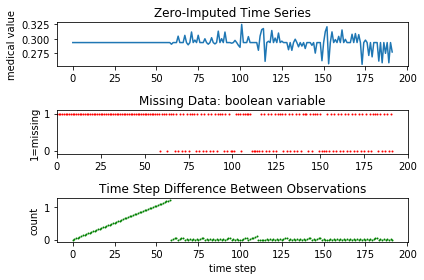

patient num 1 variable number:  45
index where Diff got 0.0 b/c there was outlier, n=  0


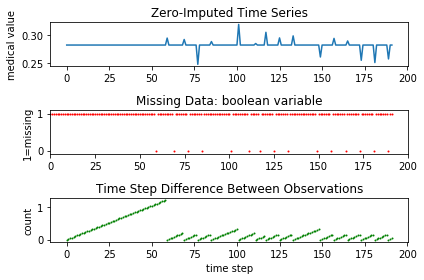

patient num 1 variable number:  46
index where Diff got 0.0 b/c there was outlier, n=  0


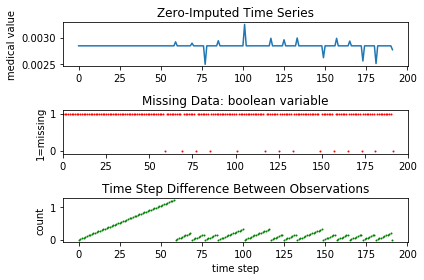

patient num 1 variable number:  47
index where Diff got 0.0 b/c there was outlier, n=  0


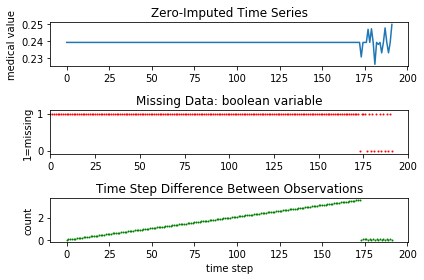

patient num 1 variable number:  48
outlier tick
outlier index in original TS:  103
outlier tick
outlier index in original TS:  153
outlier tick
outlier index in original TS:  173
index where Diff got 0.0 b/c there was outlier, n=  0


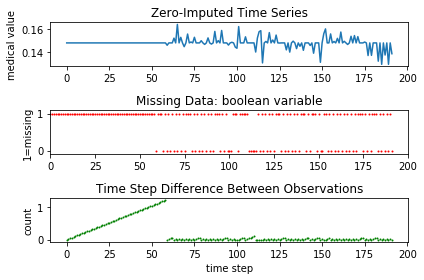

patient num 1 variable number:  49
outlier tick
outlier index in original TS:  103
outlier tick
outlier index in original TS:  153
outlier tick
outlier index in original TS:  173
index where Diff got 0.0 b/c there was outlier, n=  0


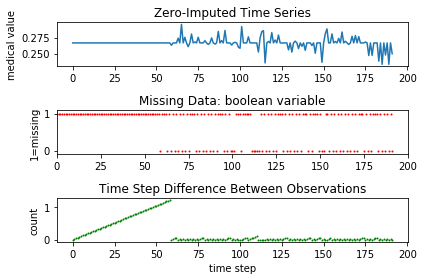

patient num 1 variable number:  50
outlier tick
outlier index in original TS:  103
outlier tick
outlier index in original TS:  153
outlier tick
outlier index in original TS:  173
index where Diff got 0.0 b/c there was outlier, n=  0


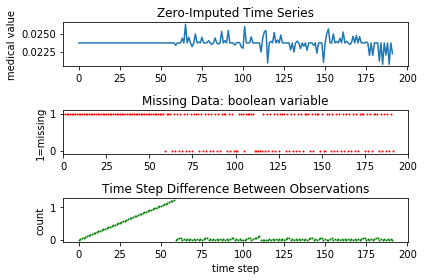

patient num 1 variable number:  51
outlier tick
outlier index in original TS:  103
outlier tick
outlier index in original TS:  153
outlier tick
outlier index in original TS:  173
index where Diff got 0.0 b/c there was outlier, n=  0


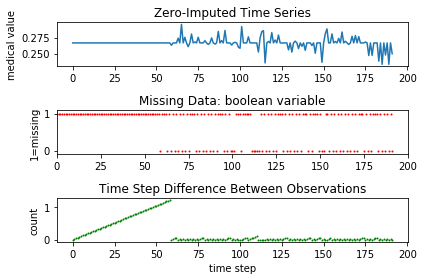

patient num 1 variable number:  52
outlier tick
outlier index in original TS:  79
outlier tick
outlier index in original TS:  83
outlier tick
outlier index in original TS:  95
outlier tick
outlier index in original TS:  97
index where Diff got 0.0 b/c there was outlier, n=  0


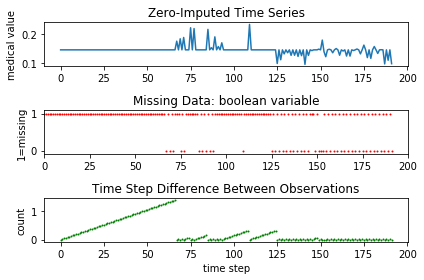

patient num 1 variable number:  53
outlier tick
outlier index in original TS:  59
outlier tick
outlier index in original TS:  125
index where Diff got 0.0 b/c there was outlier, n=  0


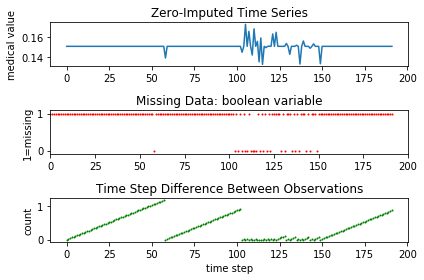

patient num 1 variable number:  54
index where Diff got 0.0 b/c there was outlier, n=  0


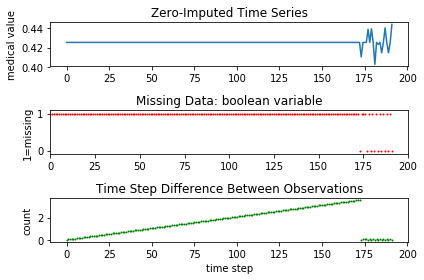

patient num 1 variable number:  55
outlier tick
outlier index in original TS:  110
outlier tick
outlier index in original TS:  127
index where Diff got 0.0 b/c there was outlier, n=  0


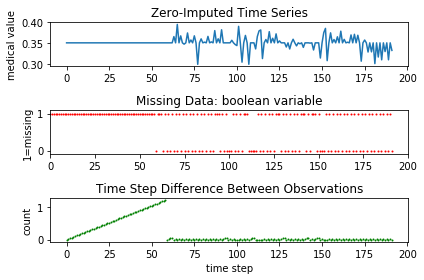

patient num 1 variable number:  56
outlier tick
outlier index in original TS:  110
outlier tick
outlier index in original TS:  127
index where Diff got 0.0 b/c there was outlier, n=  0


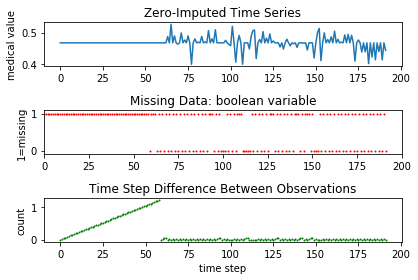

patient num 1 variable number:  57
outlier tick
outlier index in original TS:  110
outlier tick
outlier index in original TS:  127
index where Diff got 0.0 b/c there was outlier, n=  0


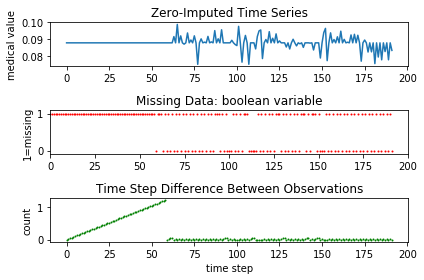

patient num 1 variable number:  58
outlier tick
outlier index in original TS:  110
outlier tick
outlier index in original TS:  127
index where Diff got 0.0 b/c there was outlier, n=  0


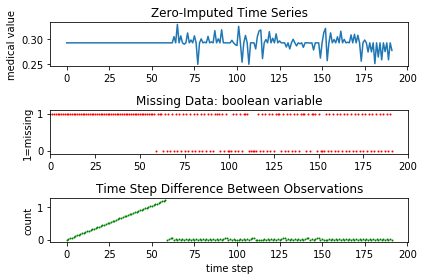

patient num 2 variable number:  0


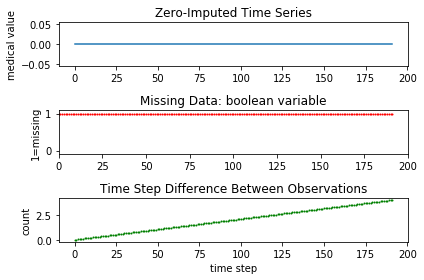

patient num 2 variable number:  1


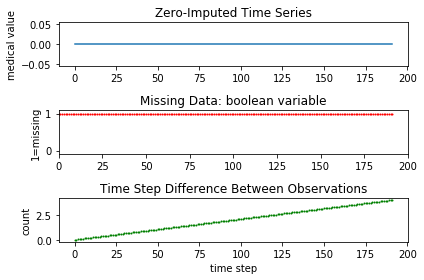

patient num 2 variable number:  2


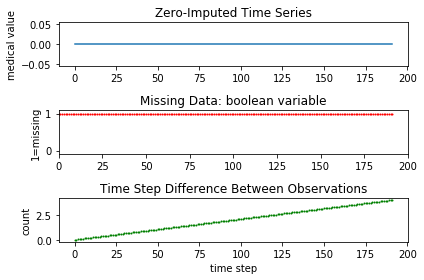

patient num 2 variable number:  3


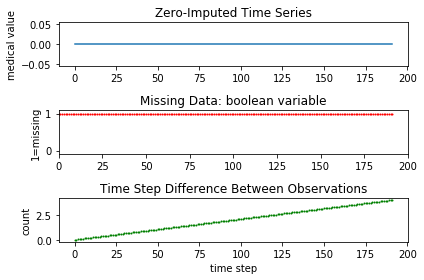

patient num 2 variable number:  4


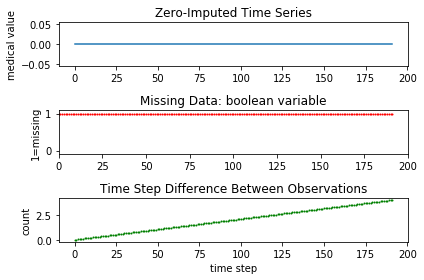

patient num 2 variable number:  5


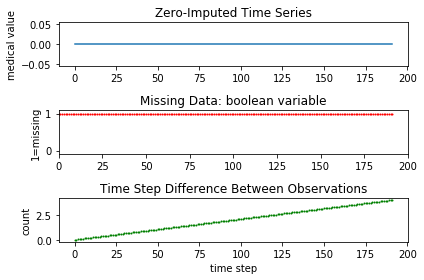

patient num 2 variable number:  6


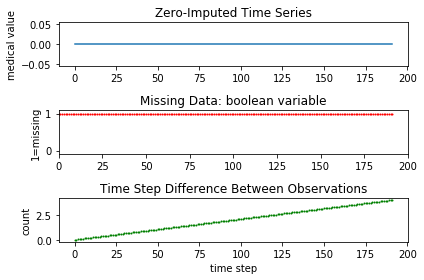

patient num 2 variable number:  7


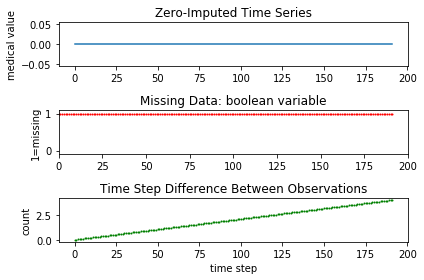

patient num 2 variable number:  8


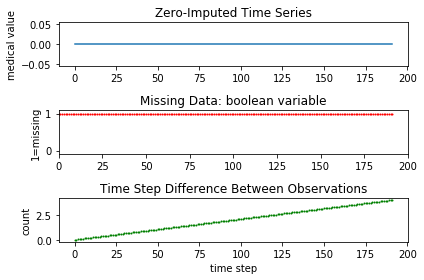

patient num 2 variable number:  9


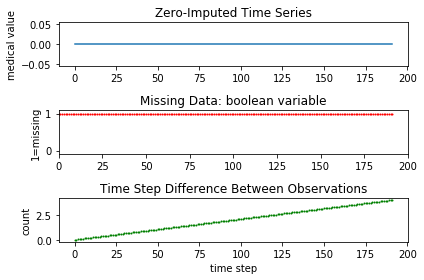

patient num 2 variable number:  10


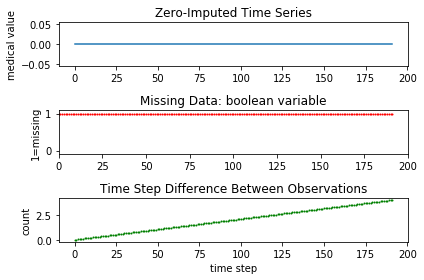

patient num 2 variable number:  11


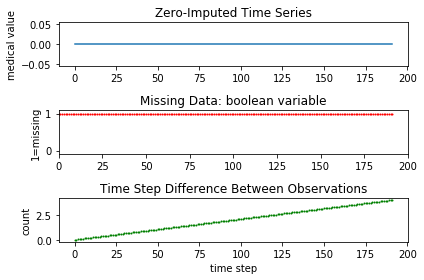

patient num 2 variable number:  12


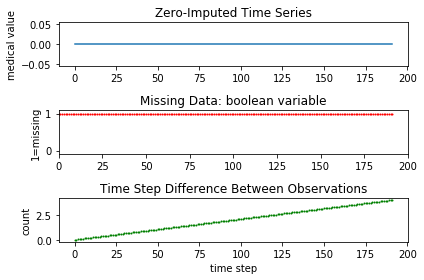

patient num 2 variable number:  13


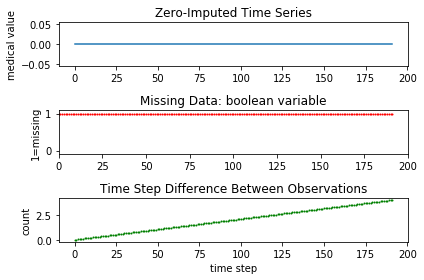

patient num 2 variable number:  14
index where Diff got 0.0 b/c there was outlier, n=  0


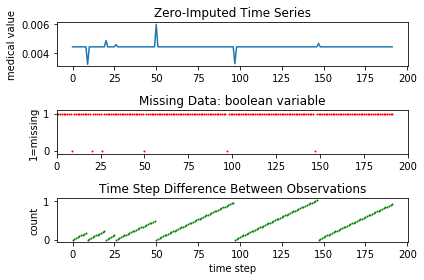

patient num 2 variable number:  15


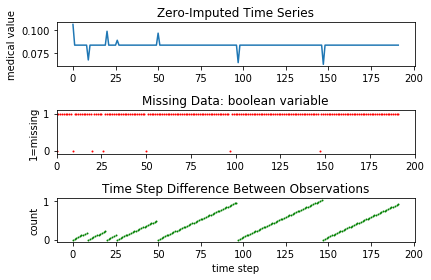

patient num 2 variable number:  16


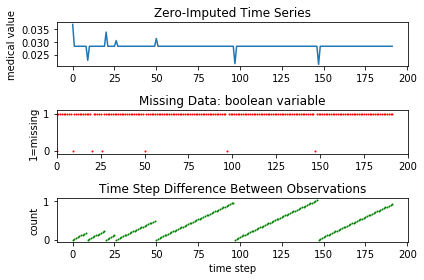

patient num 2 variable number:  17
index where Diff got 0.0 b/c there was outlier, n=  0


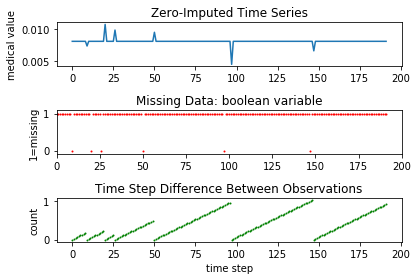

patient num 2 variable number:  18


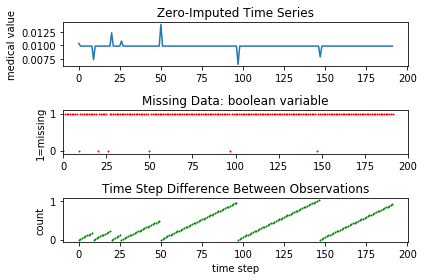

patient num 2 variable number:  19


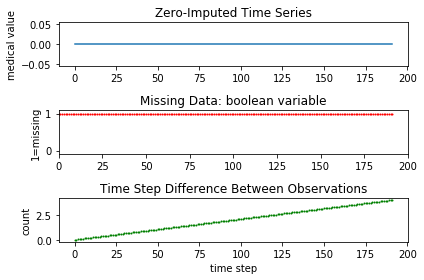

patient num 2 variable number:  20


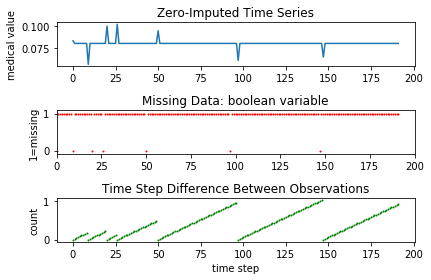

patient num 2 variable number:  21


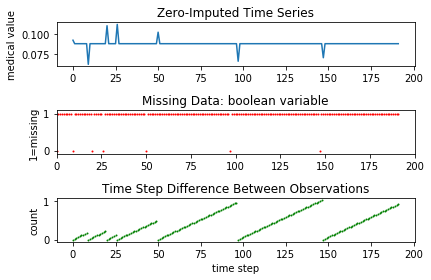

patient num 2 variable number:  22


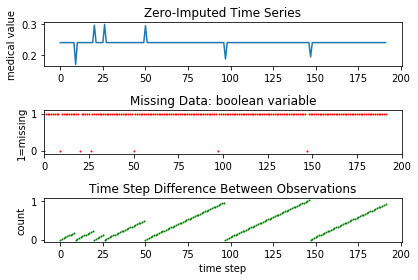

patient num 2 variable number:  23


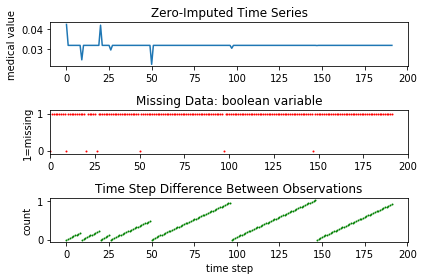

patient num 2 variable number:  24


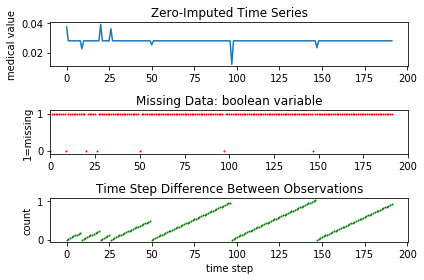

patient num 2 variable number:  25


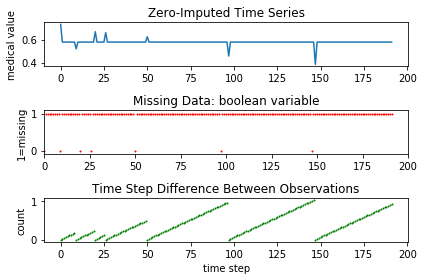

patient num 2 variable number:  26


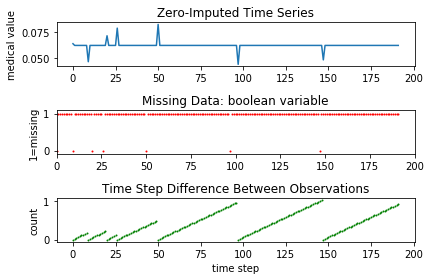

patient num 2 variable number:  27
index where Diff got 0.0 b/c there was outlier, n=  0


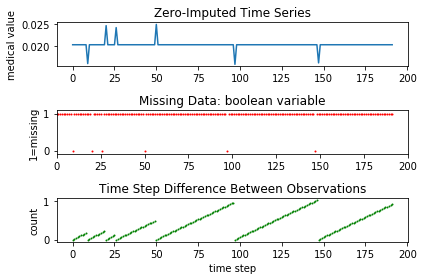

patient num 2 variable number:  28


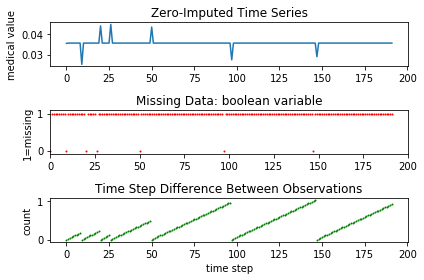

patient num 2 variable number:  29


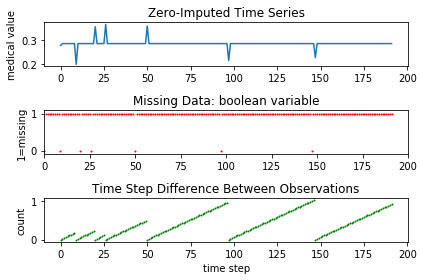

patient num 2 variable number:  30


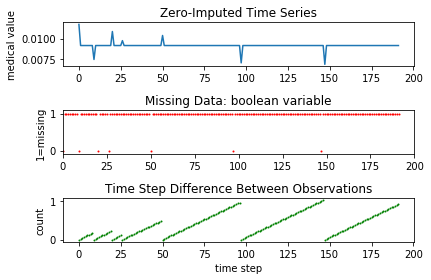

patient num 2 variable number:  31


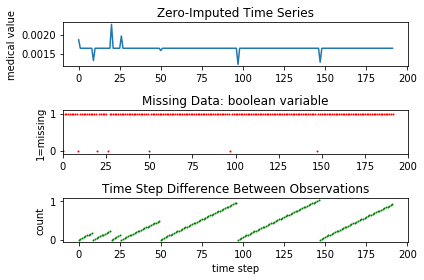

patient num 2 variable number:  32


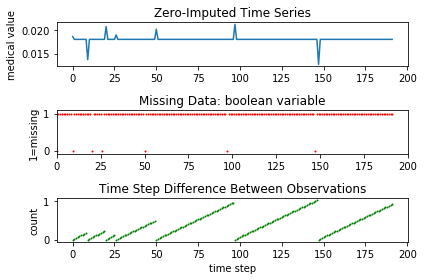

patient num 2 variable number:  33


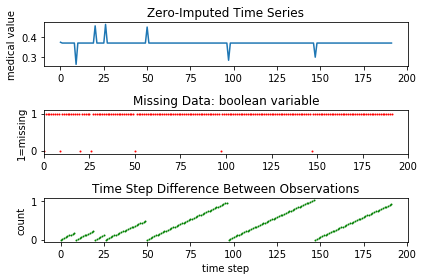

patient num 2 variable number:  34


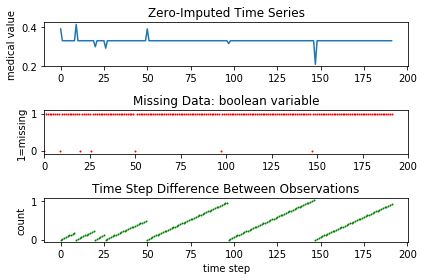

patient num 2 variable number:  35
outlier tick
outlier index in original TS:  9
outlier tick
outlier index in original TS:  45
outlier tick
outlier index in original TS:  47
outlier tick
outlier index in original TS:  97
outlier tick
outlier index in original TS:  105
outlier tick
outlier index in original TS:  147
index where Diff got 0.0 b/c there was outlier, n=  0


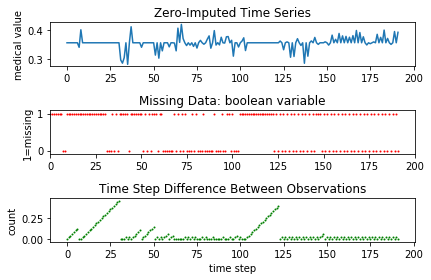

patient num 2 variable number:  36
outlier tick
outlier index in original TS:  9
outlier tick
outlier index in original TS:  45
outlier tick
outlier index in original TS:  47
outlier tick
outlier index in original TS:  64
outlier tick
outlier index in original TS:  97
outlier tick
outlier index in original TS:  106
outlier tick
outlier index in original TS:  147
index where Diff got 0.0 b/c there was outlier, n=  0


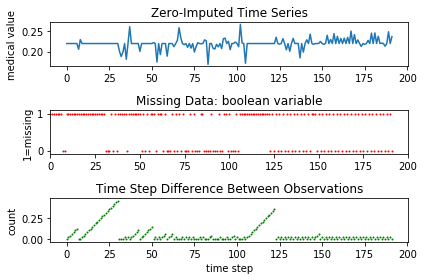

patient num 2 variable number:  37
index where Diff got 0.0 b/c there was outlier, n=  0


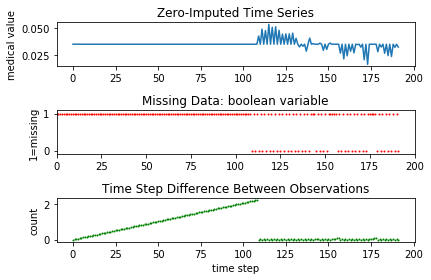

patient num 2 variable number:  38
outlier tick
outlier index in original TS:  147
index where Diff got 0.0 b/c there was outlier, n=  0


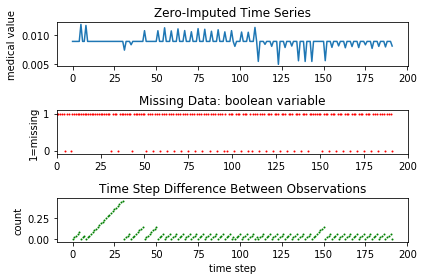

patient num 2 variable number:  39
outlier tick
outlier index in original TS:  7
outlier tick
outlier index in original TS:  39
outlier tick
outlier index in original TS:  41
outlier tick
outlier index in original TS:  47
outlier tick
outlier index in original TS:  96
outlier tick
outlier index in original TS:  103
index where Diff got 0.0 b/c there was outlier, n=  0


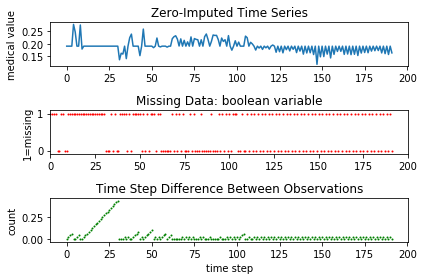

patient num 2 variable number:  40
outlier tick
outlier index in original TS:  123
outlier tick
outlier index in original TS:  147
index where Diff got 0.0 b/c there was outlier, n=  0


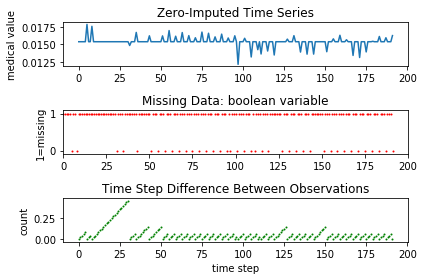

patient num 2 variable number:  41
outlier tick
outlier index in original TS:  45
outlier tick
outlier index in original TS:  47
index where Diff got 0.0 b/c there was outlier, n=  0


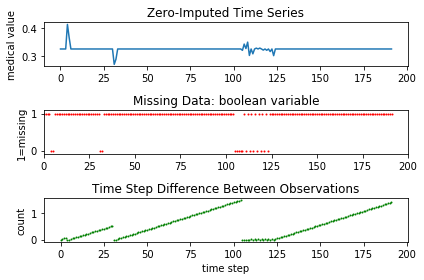

patient num 2 variable number:  42
outlier tick
outlier index in original TS:  47
index where Diff got 0.0 b/c there was outlier, n=  0


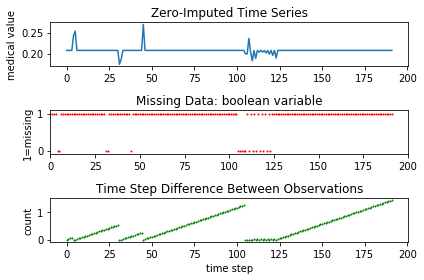

patient num 2 variable number:  43
outlier tick
outlier index in original TS:  39
outlier tick
outlier index in original TS:  41
outlier tick
outlier index in original TS:  87
index where Diff got 0.0 b/c there was outlier, n=  0


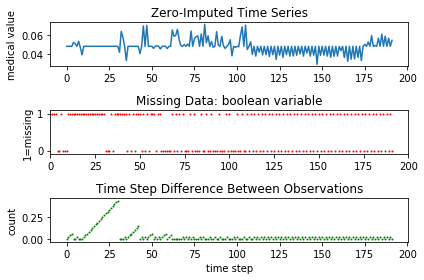

patient num 2 variable number:  44
outlier tick
outlier index in original TS:  37
outlier tick
outlier index in original TS:  45
outlier tick
outlier index in original TS:  47
outlier tick
outlier index in original TS:  57
outlier tick
outlier index in original TS:  58
index where Diff got 0.0 b/c there was outlier, n=  0


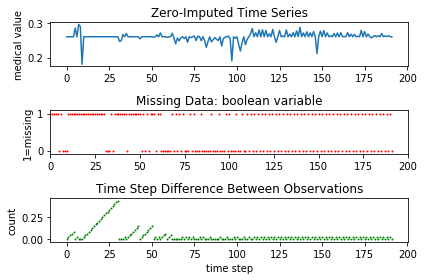

patient num 2 variable number:  45
outlier tick
outlier index in original TS:  147
index where Diff got 0.0 b/c there was outlier, n=  0


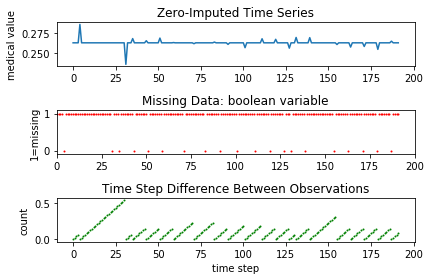

patient num 2 variable number:  46
index where Diff got 0.0 b/c there was outlier, n=  0


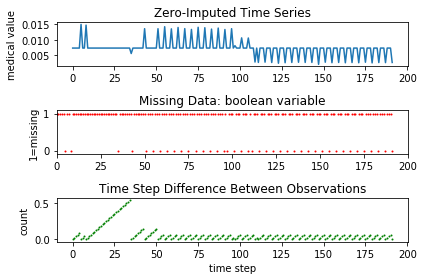

patient num 2 variable number:  47
outlier tick
outlier index in original TS:  31
outlier tick
outlier index in original TS:  107
outlier tick
outlier index in original TS:  123
index where Diff got 0.0 b/c there was outlier, n=  0


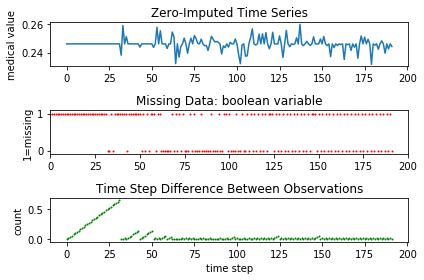

patient num 2 variable number:  48
outlier tick
outlier index in original TS:  5
outlier tick
outlier index in original TS:  7
outlier tick
outlier index in original TS:  8
outlier tick
outlier index in original TS:  31
outlier tick
outlier index in original TS:  107
outlier tick
outlier index in original TS:  123
index where Diff got 0.0 b/c there was outlier, n=  0


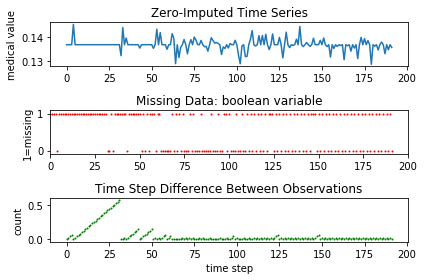

patient num 2 variable number:  49
outlier tick
outlier index in original TS:  107
outlier tick
outlier index in original TS:  123
index where Diff got 0.0 b/c there was outlier, n=  0


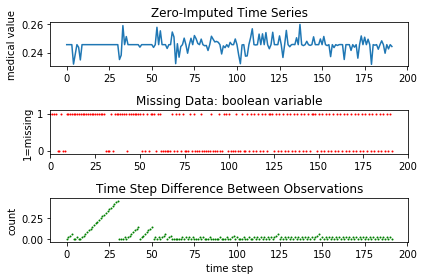

patient num 2 variable number:  50
outlier tick
outlier index in original TS:  5
outlier tick
outlier index in original TS:  7
outlier tick
outlier index in original TS:  8
outlier tick
outlier index in original TS:  31
outlier tick
outlier index in original TS:  107
outlier tick
outlier index in original TS:  123
index where Diff got 0.0 b/c there was outlier, n=  0


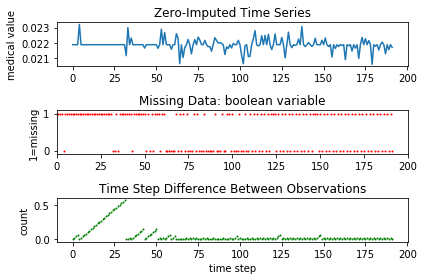

patient num 2 variable number:  51
outlier tick
outlier index in original TS:  5
outlier tick
outlier index in original TS:  7
outlier tick
outlier index in original TS:  31
outlier tick
outlier index in original TS:  107
outlier tick
outlier index in original TS:  123
index where Diff got 0.0 b/c there was outlier, n=  0


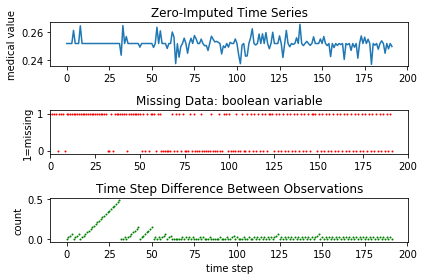

patient num 2 variable number:  52
outlier tick
outlier index in original TS:  9
outlier tick
outlier index in original TS:  45
outlier tick
outlier index in original TS:  47
outlier tick
outlier index in original TS:  51
outlier tick
outlier index in original TS:  64
outlier tick
outlier index in original TS:  97
index where Diff got 0.0 b/c there was outlier, n=  0


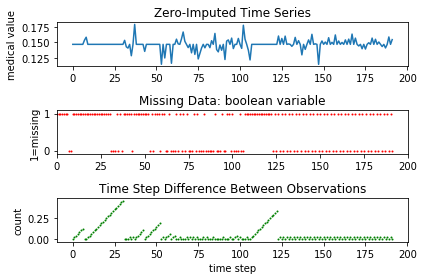

patient num 2 variable number:  53
outlier tick
outlier index in original TS:  5
outlier tick
outlier index in original TS:  107
index where Diff got 0.0 b/c there was outlier, n=  0


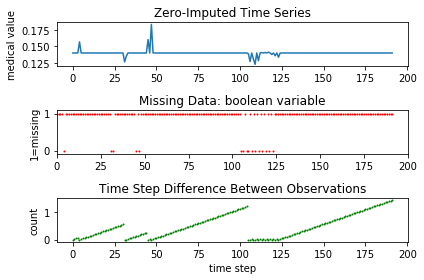

patient num 2 variable number:  54
outlier tick
outlier index in original TS:  31
outlier tick
outlier index in original TS:  107
outlier tick
outlier index in original TS:  123
index where Diff got 0.0 b/c there was outlier, n=  0


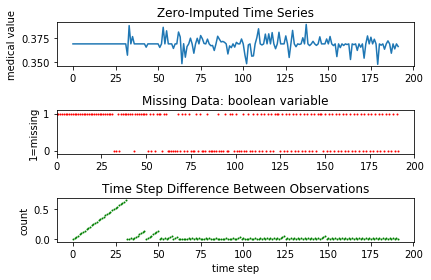

patient num 2 variable number:  55
outlier tick
outlier index in original TS:  5
outlier tick
outlier index in original TS:  7
outlier tick
outlier index in original TS:  8
outlier tick
outlier index in original TS:  31
outlier tick
outlier index in original TS:  107
outlier tick
outlier index in original TS:  123
index where Diff got 0.0 b/c there was outlier, n=  0


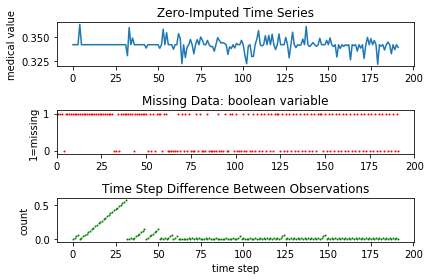

patient num 2 variable number:  56
outlier tick
outlier index in original TS:  107
outlier tick
outlier index in original TS:  123
outlier tick
outlier index in original TS:  179
index where Diff got 0.0 b/c there was outlier, n=  0


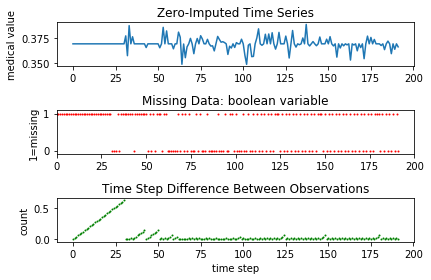

patient num 2 variable number:  57
outlier tick
outlier index in original TS:  4
outlier tick
outlier index in original TS:  8
outlier tick
outlier index in original TS:  31
outlier tick
outlier index in original TS:  107
outlier tick
outlier index in original TS:  123
index where Diff got 0.0 b/c there was outlier, n=  0


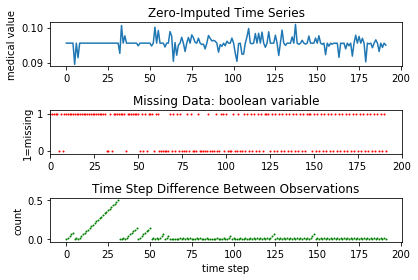

patient num 2 variable number:  58
outlier tick
outlier index in original TS:  5
outlier tick
outlier index in original TS:  7
outlier tick
outlier index in original TS:  8
outlier tick
outlier index in original TS:  31
outlier tick
outlier index in original TS:  107
outlier tick
outlier index in original TS:  123
index where Diff got 0.0 b/c there was outlier, n=  0


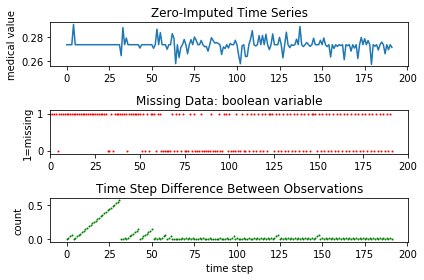

In [10]:
out1, out2, out3 = impute_mean(allTimeSeries, allMasks, allDiffs)